In [1]:
from konlpy.tag import Okt
import pandas as pd
import json
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import plotly.express as px
from dash import Dash, html, dcc, callback, Output, Input,dash_table
import plotly.graph_objects as go


plt.rc('font', family='Malgun Gothic')  #고딕체 설정
mpl.rcParams['axes.unicode_minus'] = False


# M 사

In [ ]:
milk=pd.read_csv('M사 감정분석(수정).csv')

In [ ]:
for i in range(1408):
    if milk['감정분석'][i] >=0:
        milk['감정분석'][i] = '긍정적'
    else:
        milk['감정분석'][i] = '부정적'

C:\Users\user\AppData\Local\Temp\ipykernel_17872\1656668744.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# I사

In [ ]:
ice=pd.read_csv('I사 감정분석(수정).csv')

In [ ]:
for i in range(len(ice['내용'])):
    if ice['감정분석'][i] >=0:
        ice['감정분석'][i] = '긍정적'
    else:
        ice['감정분석'][i] = '부정적'

# 시각화

## 사이트별 긍부정 비율비교 

### 밀크티 긍정 부정 건수

In [ ]:
긍정_count=milk[milk['감정분석']=='긍정적']['감정분석'].count()
부정_count = milk[milk['감정분석']=='부정적']['감정분석'].count()

In [ ]:
list1 = []

In [ ]:
list1.append(['M사',긍정_count, 부정_count, 긍정_count + 부정_count])

In [ ]:
df1=pd.DataFrame(list1)

### 아이스크림 긍정 부정 건수

In [ ]:
긍정_count_ice=ice[ice['감정분석']=='긍정적']['감정분석'].count()
부정_count_ice = ice[ice['감정분석']=='부정적']['감정분석'].count()

In [ ]:
list1.append(['I사',긍정_count_ice, 부정_count_ice, 긍정_count_ice + 부정_count_ice])

In [ ]:
df1=pd.DataFrame(list1)
df1.columns=['구분','긍정건수', '부정건수', '전체건수']
df1

,구분,긍정건수,부정건수,전체건수
0,밀크티,1131,277,1408
1,아이스크림,9396,2644,12040


In [ ]:
# M사 긍부정 비교
fig = px.pie(values=[df1['긍정건수'][0],df1['부정건수'][0]], names=['긍정','부정'])

In [ ]:
# I사 긍부정 비교
fig = px.pie(values=(df1['긍정건수'][1],df1['부정건수'][1]), names=['긍정','부정'])


## 워드클라우드

### M사 워드 클라우드

In [ ]:
milk_word = milk['처리 후 내용'][0]
for i in range(1406):
    try:
        milk_word = milk_word + milk['처리 후 내용'][i+1]
    except:
        continue

In [ ]:
okt = Okt()
nouns = okt.nouns(milk_word) # 명사만 추출
words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [ ]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize= (10,10))
plt.axis('off')
plt.imshow(gen)

### I 사 워드 클라우드

In [213]:
ice_word = ice['처리 후 내용'][0]
for i in range(12039):
    try:
        ice_word = ice_word + ice['처리 후 내용'][i+1]
    except:
        continue

In [214]:
okt_ice = Okt()
nouns_ice = okt_ice.nouns(ice_word) # 명사만 추출
words_ice = [n for n in nouns_ice if len(n) > 1] # 단어의 길이가 1개인 것은 제외
c_ice = Counter(words_ice)

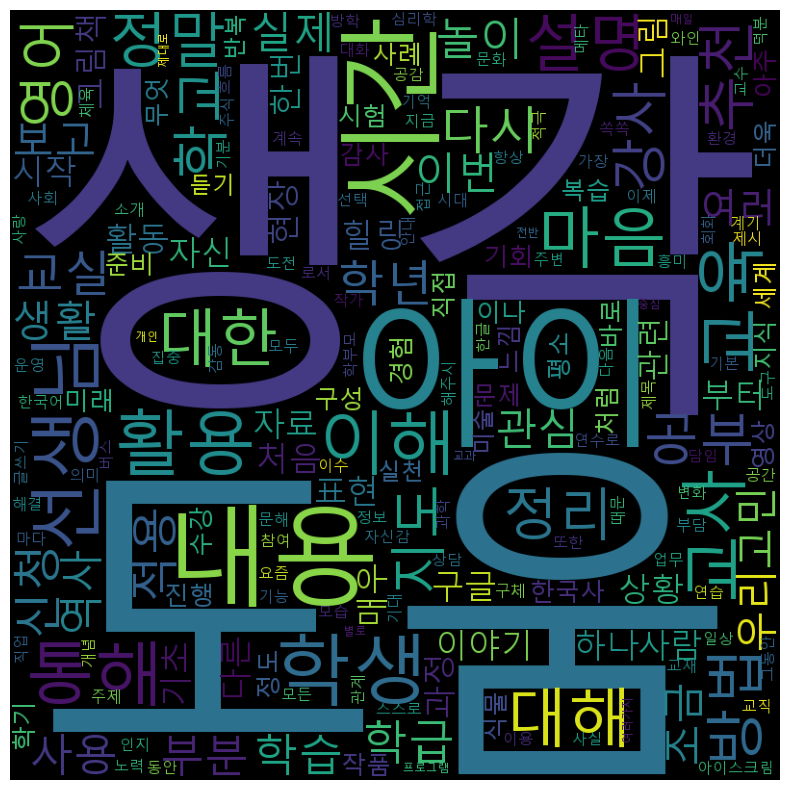

In [215]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c_ice)
plt.figure(figsize= (10,10))
plt.axis('off')
plt.imshow(gen)

## 월별 긍부정 리뷰 건수

In [216]:
milk_cou = milk.copy()
ice_cou = ice.copy()

In [217]:
# 작성일중 연도와 월을 구분한다.
milk_cou['작성 연도'] = milk_cou['작성일'].apply(lambda x: x.split('.')[0])
milk_cou['작성 월'] = milk_cou['작성일'].apply(lambda x: x.split('.')[1])

ice_cou['작성 연도'] = ice_cou['작성일'].apply(lambda x: x.split('.')[0])
ice_cou['작성 월'] = ice_cou['작성일'].apply(lambda x: x.split('.')[1])

In [218]:
# 특정월
milk_23=milk_cou[milk_cou['작성 연도']=='2023']
milk_22=milk_cou[milk_cou['작성 연도']=='2022']

ice_23=ice_cou[ice_cou['작성 연도']== '2023']
ice_22=ice_cou[ice_cou['작성 연도']== '2022']

In [219]:
milk_23_T=pd.DataFrame(milk_23[milk_23['감정분석']=='긍정적'].groupby(by='작성 월').count().loc[:,'감정분석'])

milk_23_F=pd.DataFrame(milk_23[milk_23['감정분석']=='부정적'].groupby(by='작성 월').count().loc[:,'감정분석'])

milk_22_T=pd.DataFrame(milk_22[milk_22['감정분석']=='긍정적'].groupby(by='작성 월').count().loc[:,'감정분석'])

milk_22_F=pd.DataFrame(milk_22[milk_22['감정분석']=='부정적'].groupby(by='작성 월').count().loc[:,'감정분석'])


In [220]:
ice_23_T=pd.DataFrame(ice_23[ice_23['감정분석']=='긍정적'].groupby(by='작성 월').count().loc[:,'감정분석'])

ice_23_F=pd.DataFrame(ice_23[ice_23['감정분석']=='부정적'].groupby(by='작성 월').count().loc[:,'감정분석'])

ice_22_T=pd.DataFrame(ice_22[ice_22['감정분석']=='긍정적'].groupby(by='작성 월').count().loc[:,'감정분석'])

ice_22_F=pd.DataFrame(ice_22[ice_22['감정분석']=='부정적'].groupby(by='작성 월').count().loc[:,'감정분석'])


In [221]:
result_cou = pd.concat([milk_23_T,milk_23_F,milk_22_T,milk_22_F,
                         ice_23_T,ice_23_F,ice_22_T,ice_22_F],axis=1)

In [223]:
result_cou.columns=['M사 23 긍정','M사 23 부정','M사 22 긍정','M사 22 부정',
                    'I사 23 긍정','I사 23 부정','I사 22 긍정','I사 22 부정']

In [224]:
result_cou.reset_index(drop=False, inplace = True)

In [225]:
result_cou.fillna(0, inplace=True)

# 대시보드

In [228]:
app = Dash(__name__)


fig1 = px.pie(values=[df1['긍정건수'][0],df1['부정건수'][0]], names=['긍정','부정'])
fig2 = px.pie(values=[df1['긍정건수'][1],df1['부정건수'][1]], names=['긍정','부정'])

fig = go.Figure()
def fig_name(name_n, i,color_A):
    x_A=result_cou['작성 월'].values.tolist()
    y_A = result_cou[result_cou.columns[i]].values.tolist()   
    fig.add_trace(
    go.Bar(name = name_n, x= x_A, y=y_A,marker = {'color':color_A})
    )


fig_name('M사 23 긍정',1,'#3274A1')# M사 23 긍정
fig_name('M사 23 부정',2,'#E1912C')# 'M사 23 부정'
fig_name('M사 22 긍정',3,'#3274A1')# 'M사 22 긍정'
fig_name('M사 22 부정',4,'#E1912C')# 'M사 22 부정'
fig_name('I사 23 긍정',5,'#3F48CC')# 'I사 23 긍정'
fig_name('I사 23 부정',6,'#EB3324')# 'I사 23 부정'
fig_name('I사 22 긍정',7,'#3F48CC')# 'I사 22 긍정'
fig_name('I사 22 부정',8,'#EB3324')# 'I사 22 부정'

fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            direction = "down",
            buttons=list([dict(label="M사 23년",
                                 method="update",
                                 args=[{"visible": [True, True, False,False,False,False,False,False]},
                                       {"title": "M사 23년"}]),
                            dict(label="M사 22년",
                                 method="update",
                                 args=[{"visible": [False, False, True, True, False, False,False, False]},
                                       {"title": "M사 22년",
                                        }]),
                            dict(label="I사 23년",
                                 method="update",
                                 args=[{"visible": [False, False, False, False, True, True,False,False]},
                                       {"title": "I사 23년",
                                        }]),
                            dict(label="I사 22년",
                                 method="update",
                                 args=[{"visible": [False, False, False, False, False, False,True, True]},
                                       {"title": "I사 22년",
                                        }]),
                ]),
      

        ),
    ]
)



app.layout = html.Div([
    html.Div([
        html.Div([
            html.H2(children='M사 리뷰 긍부정 비교', style={'textAlign':'center'}),
            dcc.Graph(figure=fig1),],style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    
        
        html.Div([
            html.H2(children='I사 리뷰 긍부정 비교', style={'textAlign':'center'}),
            dcc.Graph(figure=fig2),], style={'width': '49%', 'float': 'right', 'display': 'inline-block'}),
      
        html.Div([
            dash_table.DataTable(df1.to_dict('records'),[{"name" : i ,"id" : i}for i in df1.columns])]),
      
        html.Div([
            html.H1(children='월별 긍정 부정 추이', style={'textAlign':'center'}),
            dcc.Graph(figure=fig)], style={'width': '100%',  'display': 'inline-block'})

        
           ])
])


if __name__ == '__main__':  
    app.run_server(mode = 'external', port=8082, debug=True)      
    
    
    
    
  